In [1]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization 
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points

In [23]:
lowess = sm.nonparametric.lowess

In [3]:

# Read in data
df = pd.read_csv('Real estate.csv', encoding='utf-8')
# Print Dataframe
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:

# ------- Select variables -------
# x values for Linear Regression
X=df['X3 distance to the nearest MRT station'].values.reshape(-1,1) # Note, we need X to be a 2D array, hence reshape
# x values for LOWESS
x=df['X3 distance to the nearest MRT station'].values 
# y values for both
y=df['Y house price of unit area'].values

print(X.shape,x.shape,y.shape, sep = '\n--------\n')

In [19]:

# Create a scatter plot
fig = px.scatter(df, x=x, y=y, 
                 opacity=0.8, color_discrete_sequence=['black'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="House Price Based on Distance from the Nearest MRT", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [13]:
# ------- Linear Regression -------
# Define and fit the model
model1 = LinearRegression()
LR = model1.fit(X, y)

# Predict a few points with Linear Regression model for the grpah
# Create 20 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 20) 
# Predict y values for our set of X values
y_range = model1.predict(x_range.reshape(-1, 1))

In [16]:
px.scatter(x_range, y_range)

In [24]:
#  ------- LOWESS -------
# Generate y_hat values using lowess, try a couple values for hyperparameters
y_hat1 = lowess(y, x) # note, default frac=2/3
y_hat2 = lowess(y, x, frac=1/5)

In [25]:

# Create a scatter plot
fig = px.scatter(df, x=df['X3 distance to the nearest MRT station'], y=df['Y house price of unit area'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Add the prediction line
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=y_hat1[:,0], y=y_hat1[:,1], name='LOWESS, frac=2/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=y_hat2[:,0], y=y_hat2[:,1], name='LOWESS, frac=1/5', line=dict(color='orange')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="House Price Based on Distance from the Nearest MRT with Model Predictions", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [31]:
y_hat1.transpose().shape

(2, 414)

In [33]:
import matplotlib.pyplot as plt

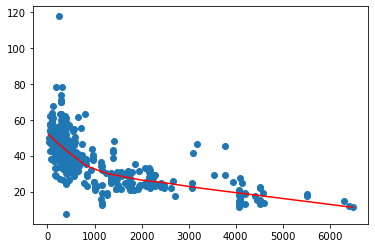

In [38]:
plt.scatter(x,y)
plt.plot(y_hat1.transpose()[0], y_hat1.transpose()[1], color = 'red')